## Crawling Data with API

In [41]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [42]:
# using sandbox as it's only available for paid subscriptions
url = 'https://cloud.iexapis.com/stable/stock/AAPL/book'

In [43]:
parameters = {
#     'token': 'Tsk_83f2c0eee6bb4600b8d8f9936a5769f2'
    'token': 'sk_b8918e562940417ca9b6615a914b75bd'
}
headers = {
    'Accepts': 'application/json'
}

In [44]:
session = Session()
session.headers.update(headers)

In [45]:
try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [46]:
print(data)

{'quote': {'symbol': 'AAPL', 'companyName': 'Apple Inc', 'primaryExchange': 'NASDAQ/NGS (GLOBAL SELECT MARKET)', 'calculationPrice': 'tops', 'open': None, 'openTime': None, 'openSource': 'official', 'close': None, 'closeTime': None, 'closeSource': 'official', 'high': None, 'highTime': None, 'highSource': None, 'low': None, 'lowTime': 1607707389843, 'lowSource': 'IEX real time price', 'latestPrice': 120.695, 'latestSource': 'IEX real time price', 'latestTime': '12:35:08 PM', 'latestUpdate': 1607708108475, 'latestVolume': None, 'iexRealtimePrice': 120.695, 'iexRealtimeSize': 200, 'iexLastUpdated': 1607708108475, 'delayedPrice': None, 'delayedPriceTime': None, 'oddLotDelayedPrice': None, 'oddLotDelayedPriceTime': None, 'extendedPrice': None, 'extendedChange': None, 'extendedChangePercent': None, 'extendedPriceTime': None, 'previousClose': 123.24, 'previousVolume': 81312170, 'change': -2.545, 'changePercent': -0.02065, 'volume': None, 'iexMarketPercent': 0.012829762516509292, 'iexVolume': 

In [47]:
len(data)

5

In [48]:
import numpy as np
import pandas as pd

In [49]:
bids = pd.DataFrame(data['bids'])
asks = pd.DataFrame(data['asks'])
trades = pd.DataFrame(data['trades'])

In [50]:
print(len(bids), len(asks), len(trades))

25 22 20


## Preprocessing Data

In [51]:
bids['date'] = pd.to_datetime(bids['timestamp'], unit='ms')
asks['date'] = pd.to_datetime(asks['timestamp'], unit='ms')
trades['date'] = pd.to_datetime(trades['timestamp'], unit='ms')

### Describe Data

In [56]:
bids

,price,size,timestamp,date
0,120.38,800,1607698121646,2020-12-11 14:48:41.646
1,120.00,400,1607700761313,2020-12-11 15:32:41.313
2,119.80,100,1607698127672,2020-12-11 14:48:47.672
3,119.00,200,1607697008608,2020-12-11 14:30:08.608
4,118.31,100,1607697629369,2020-12-11 14:40:29.369
5,117.00,100,1607697008442,2020-12-11 14:30:08.442
6,115.00,200,1607697016229,2020-12-11 14:30:16.229
7,114.39,80000,1607700761302,2020-12-11 15:32:41.302
8,110.50,100,1607697008372,2020-12-11 14:30:08.372
9,110.00,100,1607700666654,2020-12-11 15:31:06.654


In [57]:
asks

,price,size,timestamp,date
0,120.70,100,1607708106897,2020-12-11 17:35:06.897
1,123.00,700,1607697016230,2020-12-11 14:30:16.230
2,123.24,300,1607697089373,2020-12-11 14:31:29.373
3,124.00,300,1607697015554,2020-12-11 14:30:15.554
4,125.00,900,1607697015467,2020-12-11 14:30:15.467
5,126.00,1100,1607697015434,2020-12-11 14:30:15.434
6,126.20,300,1607697015460,2020-12-11 14:30:15.460
7,126.32,100,1607700761270,2020-12-11 15:32:41.270
8,127.00,700,1607697015493,2020-12-11 14:30:15.493
9,127.50,200,1607697015458,2020-12-11 14:30:15.458


In [54]:
trades

,price,size,tradeId,isISO,isOddLot,isOutsideRegularHours,isSinglePriceCross,isTradeThroughExempt,timestamp,date
0,120.695,200,1038612013,False,False,False,False,False,1607708108475,2020-12-11 17:35:08.475
1,120.690,100,1038480880,True,False,False,False,False,1607708106411,2020-12-11 17:35:06.411
2,120.705,100,1038399972,False,False,False,False,False,1607708105299,2020-12-11 17:35:05.299
3,120.705,100,1038399935,False,False,False,False,False,1607708105298,2020-12-11 17:35:05.298
4,120.705,100,1038352460,False,False,False,False,False,1607708104749,2020-12-11 17:35:04.749
5,120.705,100,1038236543,False,False,False,False,False,1607708102703,2020-12-11 17:35:02.703
6,120.710,100,1038174719,True,False,False,False,False,1607708101733,2020-12-11 17:35:01.733
7,120.725,100,1037818300,False,False,False,False,False,1607708097664,2020-12-11 17:34:57.664
8,120.715,416,1037808353,False,False,False,False,False,1607708097495,2020-12-11 17:34:57.495
9,120.715,200,1037745079,False,False,False,False,False,1607708096495,2020-12-11 17:34:56.495


### Save to CSV

In [29]:
bids.to_csv('bids/12122020.csv')
asks.to_csv('asks/12122020.csv')
trades.to_csv('trades/12122020.csv')

### Plot data

In [33]:
import matplotlib.pyplot as plt

In [74]:
trades = trades.sort_values('timestamp')

In [75]:
asks = asks.sort_values('timestamp')

In [76]:
bids = bids.sort_values('timestamp')

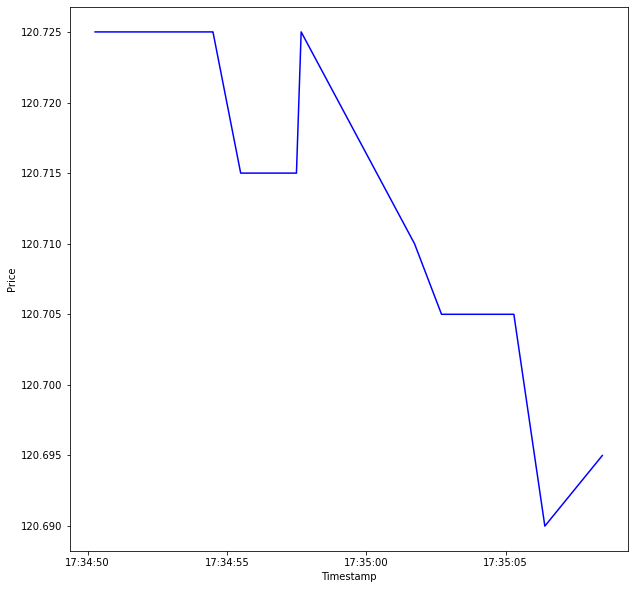

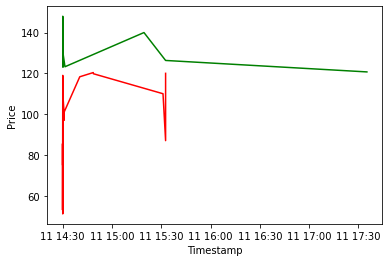

In [91]:
fig = plt.figure(num=2,figsize=(10,10))
plt.plot(trades['date'], trades['price'],'b')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()
plt.plot(bids['date'], bids['price'],'r')
plt.plot(asks['date'], asks['price'],'g')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()